**Assignment 2: Image Classification and Segmentation**

**Importing Libraries:**

In [26]:
import tensorflow as tf
from tensorflow.keras.applications import VGG19, Xception, InceptionV3, MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt

**Data Preparation:**

batch_size and image_size are set to determine the batch size for training and the image size for preprocessing.
train_data_dir, valid_data_dir, and test_data_dir are defined as the directories where the training, validation, and test datasets are locattion.

In [45]:
batch_size=32
image_size=128


dir='small/'
train_data_dir = dir+'train'
valid_data_dir = dir+'val'
test_data_dir = 'data/og/test/'

The ImageDataGenerator is used to preprocess the image data. It applies rescaling to the pixel values, which is a common practice to ensure data is within a certain range (in this case, [0, 1]).
Two data generators, train_generator and valid_generator, are created using the ImageDataGenerator to prepare batches of images and their corresponding labels for training and validation.

In [28]:
datagen = ImageDataGenerator(rescale=1.0 / 255.0)


train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical')

valid_generator = datagen.flow_from_directory(
    valid_data_dir,
    target_size=(image_size,image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 3600 images belonging to 4 classes.


Found 720 images belonging to 4 classes.


In [56]:
train_generator[0][0].shape

(32, 128, 128, 3)

In [57]:
train_generator[0][1].shape

(32, 4)

In [58]:
train_generator.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

In [29]:
num_classes = len(os.listdir(train_data_dir))
num_classes

4

**Model 1 - VGG19:**

VGG19, a pre-trained deep learning model that has been trained on the ImageNet dataset, is loaded as base_model1.
A new model (model) is created and stacked on top of base_model1. The additional layers include a global average pooling layer and fully connected (dense) layers for classification.
The layers of base_model1 are made non-trainable, meaning they will not be updated during the training process. This is often done to retain the pre-trained model's knowledge.
The model is compiled with settings for categorical cross-entropy loss and the Adam optimizer.
Validation accuracy is evaluated and printed, and training and validation loss/accuracy curves are displayed using Matplotlib.

In [30]:
base_model1=VGG19(weights='imagenet', include_top=False)

In [31]:
model = Sequential()
model.add(base_model1)
model.add(GlobalAveragePooling2D())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

for layer in base_model1.layers:
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
history_1 = model.fit(train_generator,validation_data=valid_generator,epochs=11,verbose=1)

Epoch 1/11
113/113 [==============================] - 14s 113ms/step - loss: 1.2741 - accuracy: 0.4317 - val_loss: 1.1550 - val_accuracy: 0.5250
Epoch 2/11
113/113 [==============================] - 12s 109ms/step - loss: 1.0746 - accuracy: 0.5536 - val_loss: 0.9978 - val_accuracy: 0.5931
Epoch 3/11
113/113 [==============================] - 12s 108ms/step - loss: 0.9618 - accuracy: 0.6064 - val_loss: 0.9250 - val_accuracy: 0.6056
Epoch 4/11
113/113 [==============================] - 12s 109ms/step - loss: 0.9051 - accuracy: 0.6200 - val_loss: 0.8698 - val_accuracy: 0.6417
Epoch 5/11
113/113 [==============================] - 13s 111ms/step - loss: 0.8440 - accuracy: 0.6622 - val_loss: 0.8309 - val_accuracy: 0.6708
Epoch 6/11
113/113 [==============================] - 13s 110ms/step - loss: 0.7886 - accuracy: 0.6808 - val_loss: 0.8154 - val_accuracy: 0.6750
Epoch 7/11
113/113 [==============================] - 13s 115ms/step - loss: 0.7572 - accuracy: 0.7036 - val_loss: 0.7836 - val_ac

In [33]:
test_loss, test_acc = model.evaluate(valid_generator)
print(f'got validation loss {test_loss}, Validation Accuracy {test_acc}.')

23/23 [==============================] - 3s 107ms/step - loss: 0.7459 - accuracy: 0.6819
got validation loss 0.7459344863891602, Validation Accuracy 0.6819444298744202.


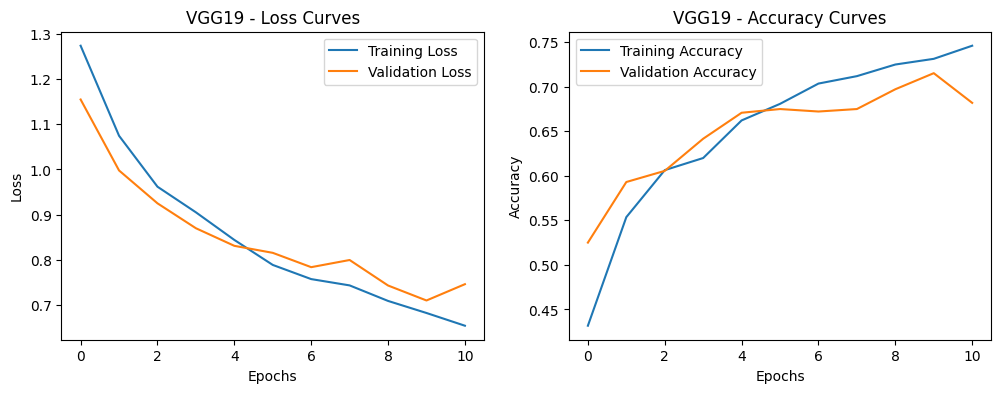

In [34]:
model_name = 'VGG19'
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'{model_name} - Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'{model_name} - Accuracy Curves')
plt.legend()

plt.show()

**Model 2 - InceptionV3:**

The code follows a similar process as Model 1 but uses InceptionV3 as the base model to create model2. InceptionV3 is another pre-trained model.
Model 2 is compiled, trained, and evaluated, with results visualized in the same way as Model ccessible for future use.

In [35]:
base_model2=InceptionV3(weights='imagenet', include_top=False)

In [36]:
model2 = Sequential()
model2.add(base_model2)
model2.add(GlobalAveragePooling2D())
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

for layer in base_model2.layers:
    layer.trainable = False

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
history_2 = model2.fit(train_generator,validation_data=valid_generator,epochs=11,verbose=1)

Epoch 1/11
113/113 [==============================] - 19s 119ms/step - loss: 1.0491 - accuracy: 0.5656 - val_loss: 0.8162 - val_accuracy: 0.6611
Epoch 2/11
113/113 [==============================] - 11s 100ms/step - loss: 0.7489 - accuracy: 0.6986 - val_loss: 0.7323 - val_accuracy: 0.7000
Epoch 3/11
113/113 [==============================] - 11s 99ms/step - loss: 0.6651 - accuracy: 0.7406 - val_loss: 0.7590 - val_accuracy: 0.7042
Epoch 4/11
113/113 [==============================] - 11s 101ms/step - loss: 0.5855 - accuracy: 0.7731 - val_loss: 0.6443 - val_accuracy: 0.7444
Epoch 5/11
113/113 [==============================] - 12s 104ms/step - loss: 0.5103 - accuracy: 0.7981 - val_loss: 0.6727 - val_accuracy: 0.7542
Epoch 6/11
113/113 [==============================] - 12s 103ms/step - loss: 0.4813 - accuracy: 0.8133 - val_loss: 0.7149 - val_accuracy: 0.7306
Epoch 7/11
113/113 [==============================] - 12s 103ms/step - loss: 0.4474 - accuracy: 0.8269 - val_loss: 0.6588 - val_acc

In [38]:
test_loss, test_acc = model2.evaluate(valid_generator)
print(f'got validation loss {test_loss}, Validation Accuracy {test_acc}.')

23/23 [==============================] - 2s 92ms/step - loss: 0.7053 - accuracy: 0.7514
got validation loss 0.7052643299102783, Validation Accuracy 0.7513889074325562.


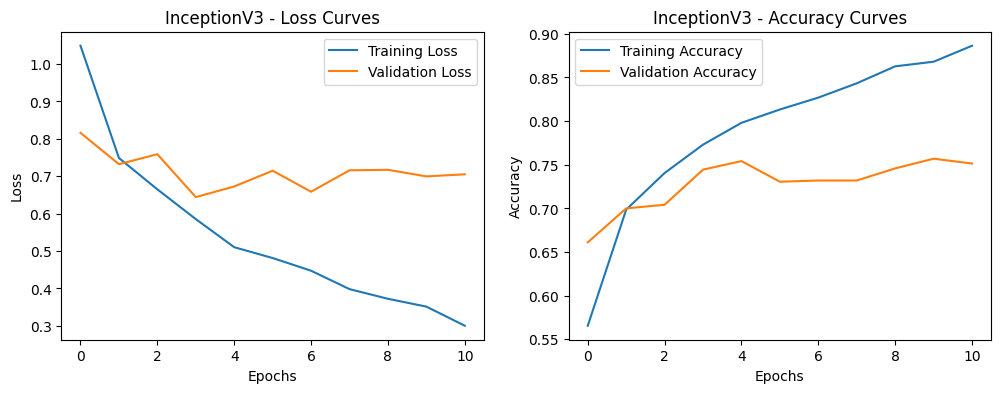

In [39]:
model_name = 'InceptionV3'
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'{model_name} - Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_2.history['accuracy'], label='Training Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'{model_name} - Accuracy Curves')
plt.legend()

plt.show()

**Model 3 - MobileNetV2:**

Similar to the previous models, this section uses MobileNetV2 as the base model to create model3.
The layers of MobileNetV2 are frozen to keep them non-trainable.
The model is compiled, trained, and evaluated, and the results are plotted.


In [40]:
base_model3=MobileNetV2(weights='imagenet', include_top=False)

In [41]:
model3 = Sequential()
model3.add(base_model2)
model3.add(GlobalAveragePooling2D())
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

for layer in base_model2.layers:
    layer.trainable = False

model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
history_3 = model3.fit(train_generator,validation_data=valid_generator,epochs=11,verbose=1)

Epoch 1/11
113/113 [==============================] - 20s 127ms/step - loss: 1.0243 - accuracy: 0.5767 - val_loss: 0.8738 - val_accuracy: 0.6361
Epoch 2/11
113/113 [==============================] - 13s 115ms/step - loss: 0.7461 - accuracy: 0.7053 - val_loss: 0.7780 - val_accuracy: 0.6750
Epoch 3/11
113/113 [==============================] - 13s 115ms/step - loss: 0.6463 - accuracy: 0.7439 - val_loss: 0.7374 - val_accuracy: 0.7125
Epoch 4/11
113/113 [==============================] - 13s 115ms/step - loss: 0.5886 - accuracy: 0.7678 - val_loss: 0.6439 - val_accuracy: 0.7528
Epoch 5/11
113/113 [==============================] - 13s 116ms/step - loss: 0.5075 - accuracy: 0.8000 - val_loss: 0.6714 - val_accuracy: 0.7458
Epoch 6/11
113/113 [==============================] - 13s 113ms/step - loss: 0.4812 - accuracy: 0.8153 - val_loss: 0.6632 - val_accuracy: 0.7458
Epoch 7/11
113/113 [==============================] - 13s 117ms/step - loss: 0.4720 - accuracy: 0.8183 - val_loss: 0.6706 - val_ac

In [43]:
test_loss, test_acc = model3.evaluate(valid_generator)
print(f'got validation loss {test_loss}, Validation Accuracy {test_acc}.')

23/23 [==============================] - 2s 94ms/step - loss: 0.7290 - accuracy: 0.7458
got validation loss 0.7290422916412354, Validation Accuracy 0.7458333373069763.


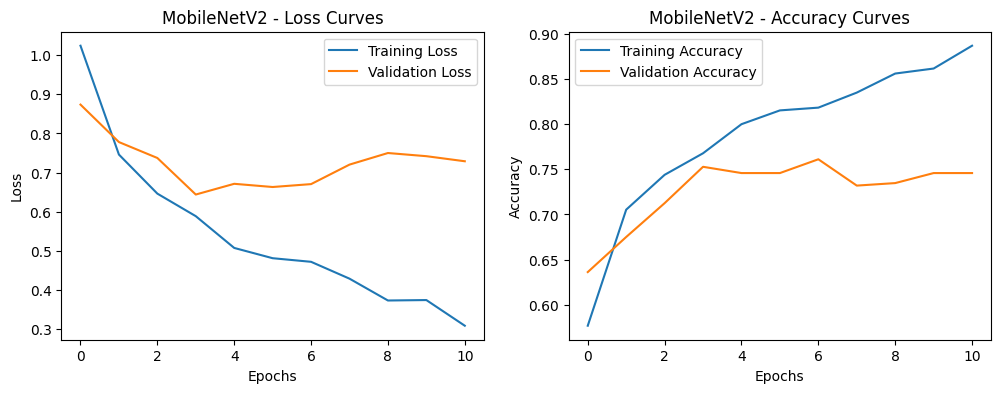

In [44]:
model_name = 'MobileNetV2'
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'{model_name} - Loss Curves')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_3.history['accuracy'], label='Training Accuracy')
plt.plot(history_3.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'{model_name} - Accuracy Curves')
plt.legend()

plt.show()

**Data Generation for Test Set:**
The code creates a data generator (test_generator) for preprocessing and loading the test dataset. It resizes images to the specified image_size and sets the batch size to 32. Class mode is not used for the test dataset.


In [47]:
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

test_generator = datagen.flow_from_directory(
    test_data_dir,
    target_size=(image_size,image_size),
    batch_size=32
    # class_mode='categorical'
    )

Found 10000 images belonging to 1 classes.


**Prediction and Aggregation:**

The three models (model, model2, and model3) are used to make predictions on the test dataset.
The predictions are aggregated by summing the class probabilities for each image. This is a form of ensemble learning, where multiple models' outputs are combined to make a final prediction.


In [48]:
pred1=model.predict(test_generator)
pred2=model2.predict(test_generator)
pred3=model3.predict(test_generator)

313/313 [==============================] - 28s 85ms/step


In [49]:
pred1[0]

array([1.6350465e-04, 3.1155812e-02, 1.9385554e-02, 9.4929516e-01],
      dtype=float32)

In [50]:
pred2[0]

array([9.2117465e-01, 5.9871247e-05, 7.8186385e-02, 5.7912769e-04],
      dtype=float32)

In [51]:
pred3[0]

array([0.00266204, 0.3367742 , 0.2527188 , 0.40784496], dtype=float32)

In [52]:
prediction = [[0,0,0,0] for i in range (len(pred1))]
for i in range (len(pred1)):
    for j in range (4):
        prediction[i][j]+=pred1[i][j]+pred2[i][j]+pred3[i][j]

In [53]:
prediction[0]

[0.9240002036094666,
 0.3679898977279663,
 0.3502907454967499,
 1.3577191829681396]

In [59]:
train_generator.class_indices

{'CNV': 0, 'DME': 1, 'DRUSEN': 2, 'NORMAL': 3}

**Class Mapping and Final Predictions:**

A mapping of class labels is defined to map numerical class predictions to human-readable labels.
For each test sample, the class with the highest aggregated probability is selected as the predicted class label.

In [60]:
prd_map_class = {0:'CNV' , 1:'DME' , 2:'DRUSEN' , 3:'NORMAL'}
prdedicted_lables=[]
for i in prediction:
    z=max(i)
    for j in range(4):
        if i[j]==z:
            prdedicted_lables.append(prd_map_class[j])
            break

In [61]:
prdedicted_lables[0]

'NORMAL'

**CSV Output:**

The final predicted labels are saved to a CSV file named 'data.csv' using the csv library. This allows you to export the predictions for further analysis or sharing the results with others.
Output:

A message is printed to indicate that the predicted labels have been successfully saved to the CSV file, making them accessible for future use.

In [64]:
import csv

# Sample Python array (replace this with your own data)
data = prdedicted_lables

# Specify the CSV file path
csv_file = 'data.csv'

# Write the array to the CSV file
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(data)

print(f'Array saved to {csv_file}')

Array saved to data.csv
